## Lead Scoring Case Study

In [181]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from matplotlib.pyplot import xticks
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
# Reading the dataset

df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Preparation

In [3]:
# View the shape of dataset
df.shape

(9240, 37)

In [4]:
# View the datatypes of the variables present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Describe the data and obtaining statistical information
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Cleaning the dataset

In [7]:
# Replacing 'Select' values to NaN.

df = df.replace('Select', np.nan)

In [8]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# Dropping columns having more than 70% NA values.
df = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>70)].columns, 1)

In [12]:
# Checking Lead Quality which highlights the quality of the leads
df['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

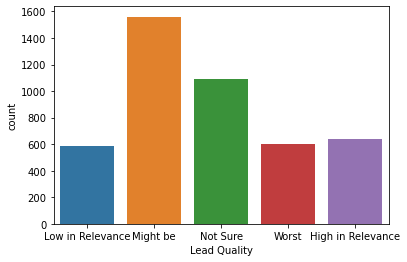

In [13]:
sns.countplot(df['Lead Quality'])

In [14]:
df['Lead Quality'] = df['Lead Quality'].replace(np.nan, 'Not Sure')

<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

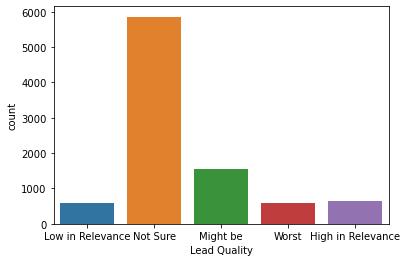

In [15]:
sns.countplot(df['Lead Quality'])

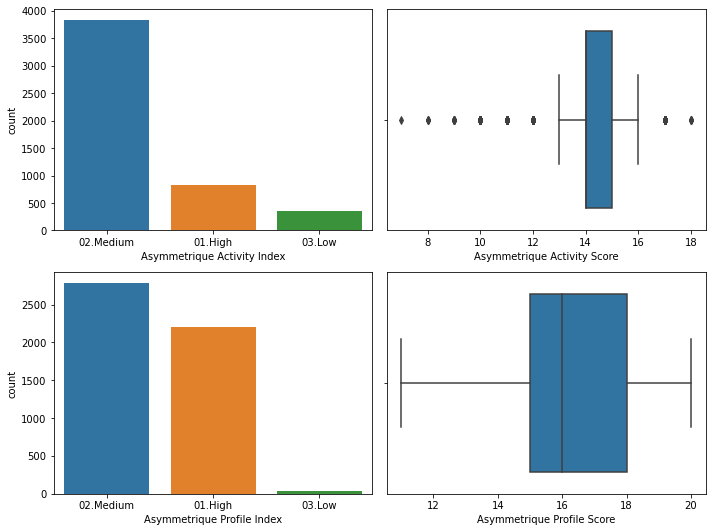

In [16]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(df['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(df['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(df['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(df['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

In [18]:
# Dropping columns with high null values
df = df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [19]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [20]:
df.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

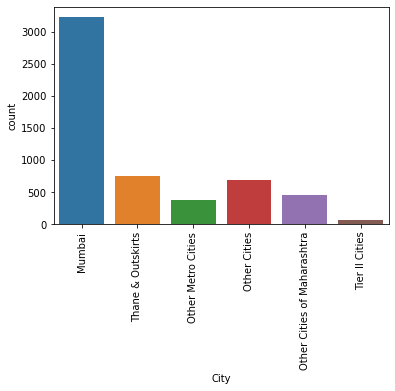

In [23]:
sns.countplot(df.City)
xticks(rotation = 90)

In [24]:
# Since Mumbai contains the maximum data, we add Mumbai to missing values
df['City'] = df['City'].replace(np.nan, 'Mumbai')

In [25]:
df.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

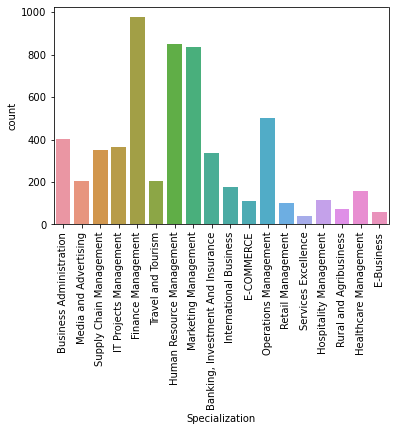

In [26]:
sns.countplot(df.Specialization)
xticks(rotation = 90)

In [27]:
# Adding the value - Others to missing values in specialization
df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')

In [28]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [29]:
df.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

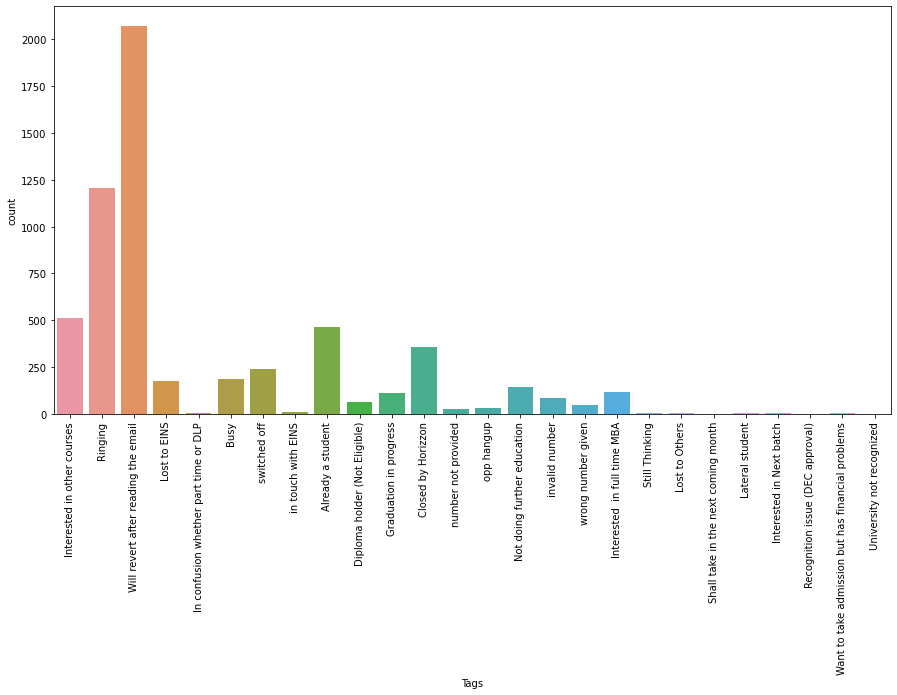

In [30]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(df.Tags)
xticks(rotation = 90)

In [31]:
# Adding the value - Revert after reading email to missing values in tag
df['Tags'] = df['Tags'].replace(np.nan, 'Revert after reading email')

In [32]:
df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [33]:
# Adding the value - Better Career Prospects to missing values in What matters most to you in choosing a course
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [34]:
df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [35]:
# Adding the value - Unemployed to missing values in What is your current occupation
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [36]:
# Adding the value - India to missing values in Country
df['Country'] = df['Country'].replace(np.nan, 'India')

In [38]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [39]:
# Droppping missing value under 2%.
df.dropna(inplace = True)

In [40]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [41]:
df.to_csv('Leads_cleaned')

## Exploratory Data Analytics

### Univariate Analysis

In [42]:
# Converted shows whether a lead has been converted or not
converted = (sum(df['Converted'])/len(df['Converted'].index))*100
converted

37.85541106458012

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

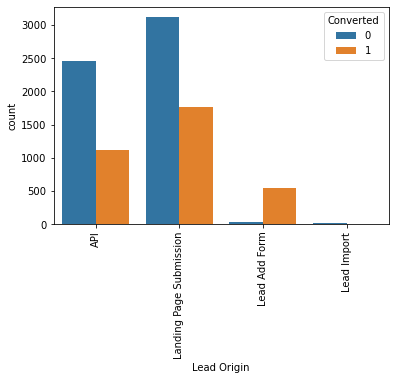

In [43]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

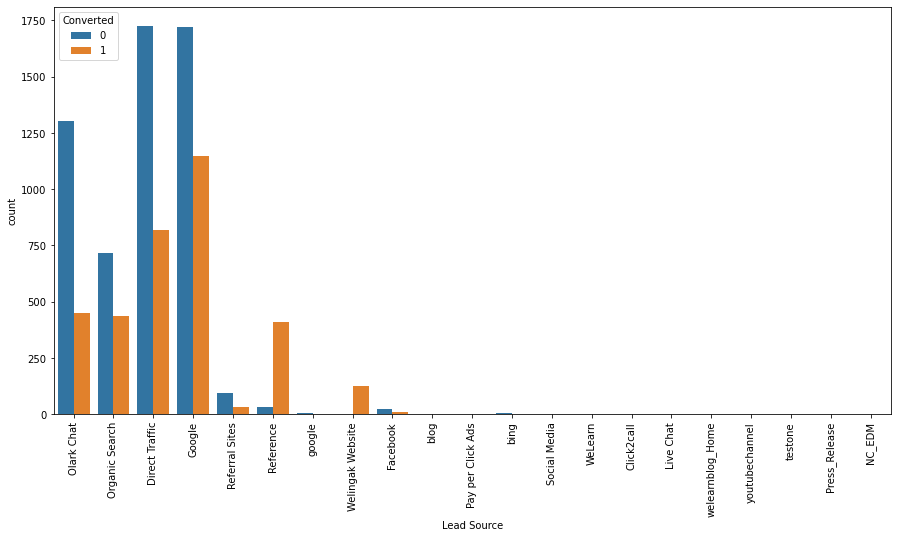

In [44]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
xticks(rotation = 90)

In [46]:
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

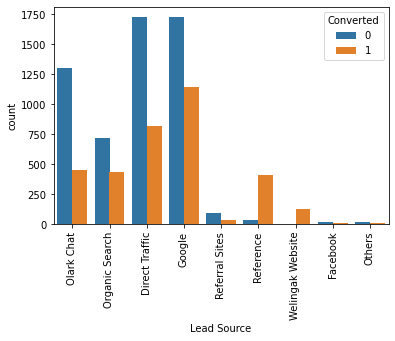

In [47]:
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
xticks(rotation = 90)

<AxesSubplot:xlabel='Do Not Call', ylabel='count'>

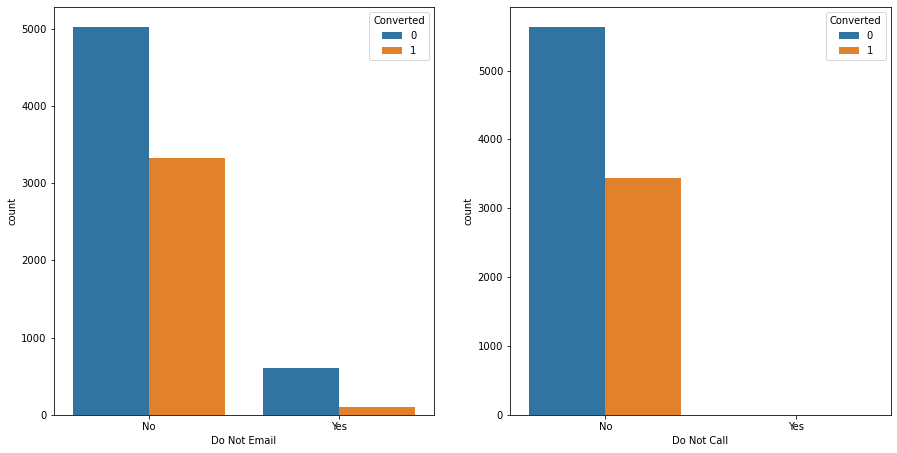

In [48]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = df, ax = axs[1])

In [49]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

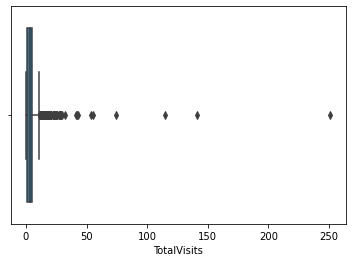

In [50]:
sns.boxplot(df['TotalVisits'])

In [51]:
# Capping the outliers to 95% value for analysis.
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='TotalVisits'>

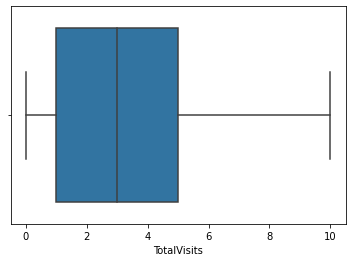

In [52]:
sns.boxplot(df['TotalVisits'])

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

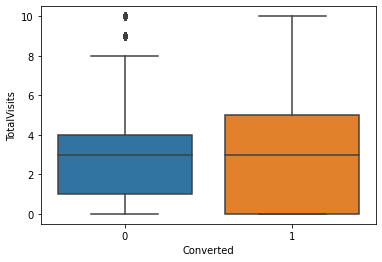

In [53]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)

In [54]:
df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Total Time Spent on Website'>

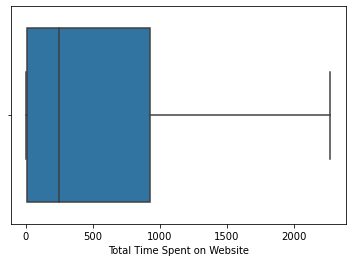

In [55]:
sns.boxplot(df['Total Time Spent on Website'])

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

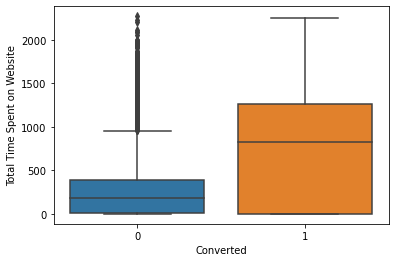

In [56]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)

In [57]:
df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

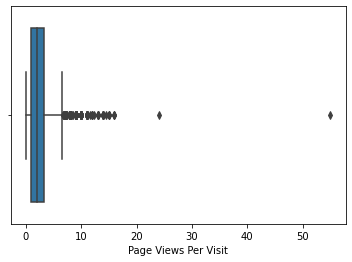

In [58]:
sns.boxplot(df['Page Views Per Visit'])

In [59]:
# Capping the outliers to 95% value for analysis.
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Page Views Per Visit'>

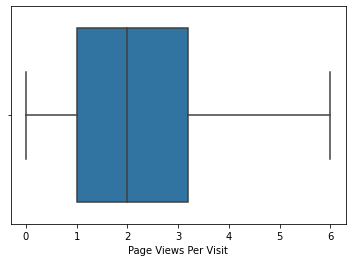

In [60]:
sns.boxplot(df['Page Views Per Visit'])

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

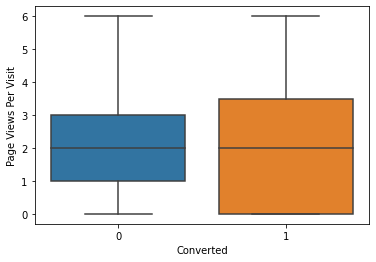

In [61]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)

In [62]:
df['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

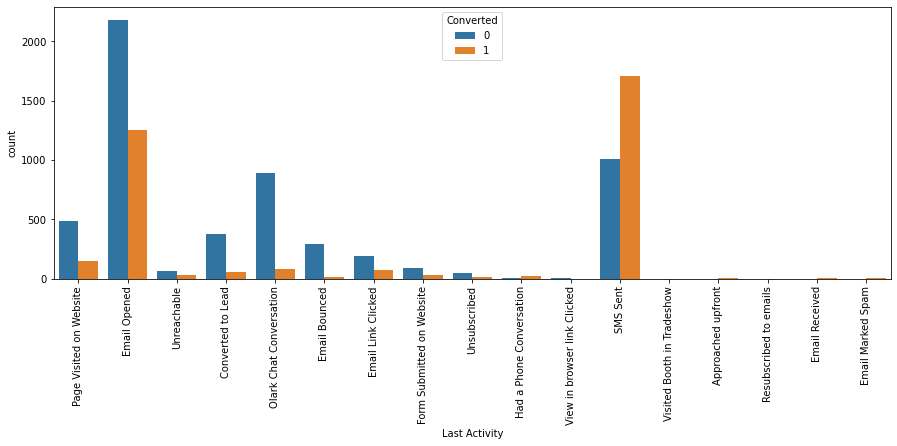

In [63]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
xticks(rotation = 90)

In [64]:
# Joining all other activities as Other_Activity
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

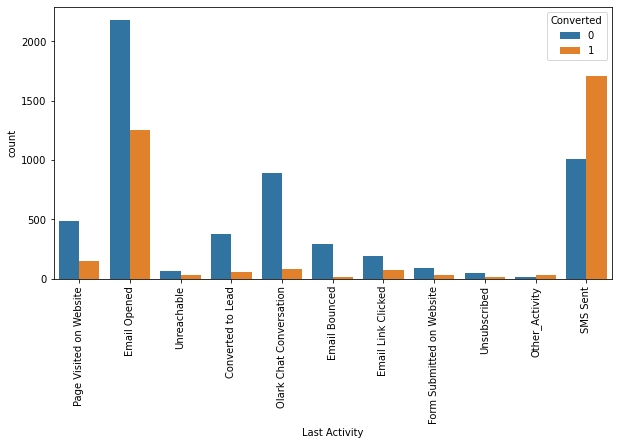

In [65]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
xticks(rotation = 90)

In [66]:
df.Country.describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

In [67]:
df.Specialization.describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

In [68]:
df['Specialization'] = df['Specialization'].replace(['Others'], 'Other_Specialization')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Other_Specialization'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

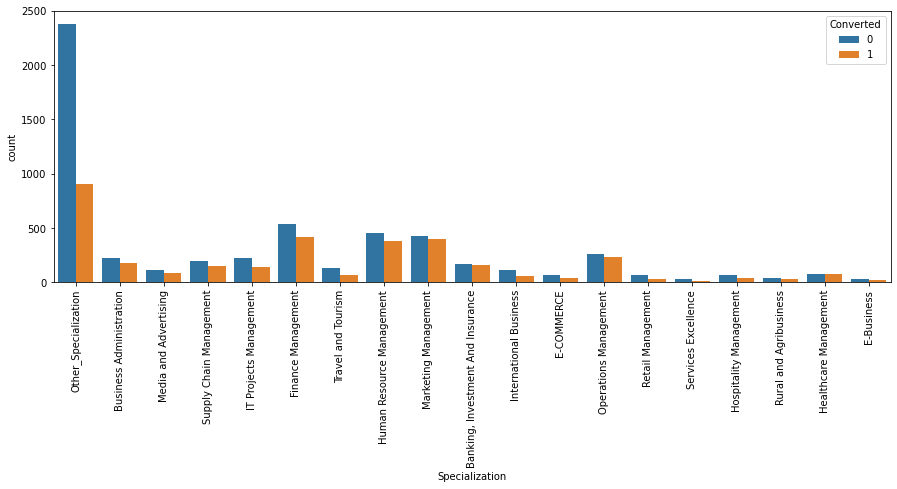

In [69]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = df)
xticks(rotation = 90)

In [70]:
df['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

In [71]:
df['What is your current occupation'] = df['What is your current occupation'].replace(['Other'], 'Other_Occupation')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other_Occupation'),
  Text(5, 0, 'Housewife')])

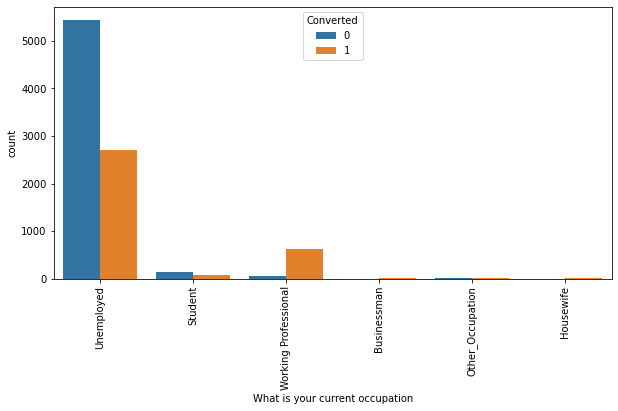

In [72]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
xticks(rotation = 90)

In [73]:
df['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

In [74]:
df.Search.describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

In [75]:
df.Magazine.describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

In [76]:
df['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

In [77]:
df['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

In [78]:
df['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

In [79]:
df['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

In [80]:
df['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

In [81]:
df['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

In [82]:
df.Tags.describe()

count                           9074
unique                            27
top       Revert after reading email
freq                            3327
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Revert after reading email'),
  Text(4, 0, 'Lost to EINS'),
  Text(5, 0, 'In confusion whether part time or DLP'),
  Text(6, 0, 'Busy'),
  Text(7, 0, 'switched off'),
  Text(8, 0, 'in touch with EINS'),
  Text(9, 0, 'Already a student'),
  Text(10, 0, 'Diploma holder (Not Eligible)'),
  Text(11, 0, 'Graduation in progress'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Closed by Horizzon'),
  Text(15, 0, 'Not doing further education'),
  Text(16, 0, 'invalid number'),
  Text(17, 0, 'wrong number given'),
  Text(18, 0, 'Interested  in full time MBA'),
  Text(19, 0, 'Still Thinking'),
  Text(20, 0, 'Lost to Others'),
  Text(21, 0, 'Shall take in the next coming month'),
  Text(22, 0, 'Lateral 

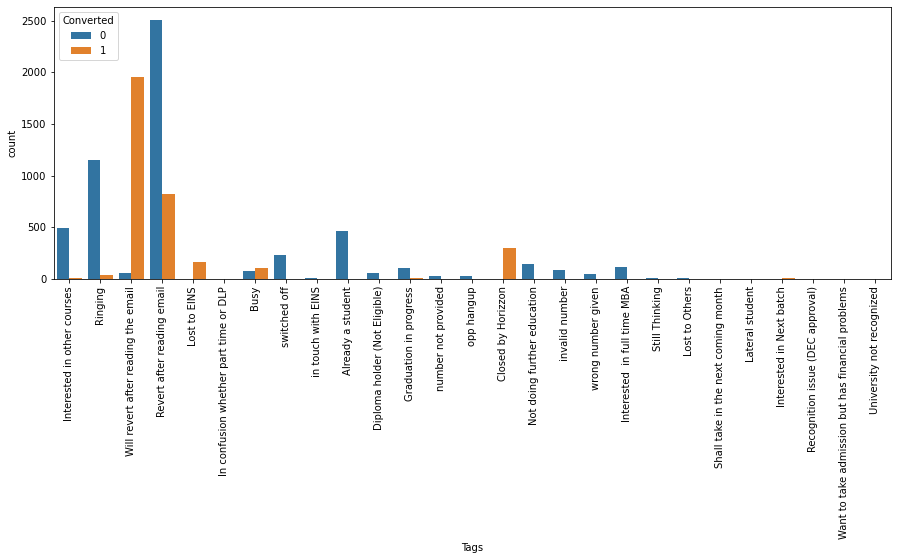

In [83]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = df)
xticks(rotation = 90)

In [84]:
# Joining all other activities to "Other_Activity"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Revert after reading email'),
  Text(4, 0, 'Lost to EINS'),
  Text(5, 0, 'Other_Tags'),
  Text(6, 0, 'Busy'),
  Text(7, 0, 'switched off'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Closed by Horizzon'),
  Text(10, 0, 'Not doing further education'),
  Text(11, 0, 'invalid number'),
  Text(12, 0, 'wrong number given'),
  Text(13, 0, 'Interested  in full time MBA')])

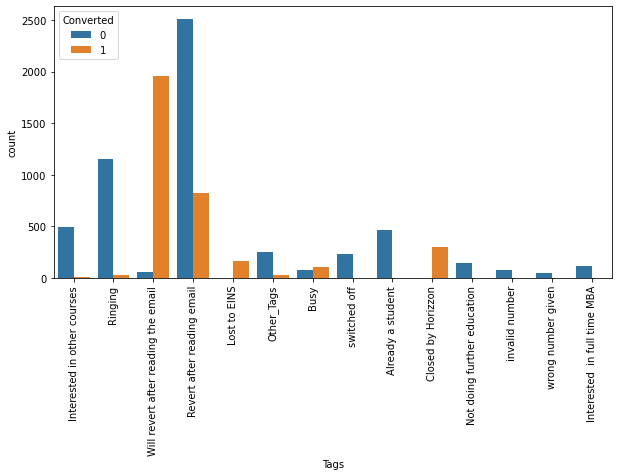

In [85]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Tags", hue = "Converted", data = df)
xticks(rotation = 90)

In [87]:
df['Lead Quality'].describe()

count         9074
unique           5
top       Not Sure
freq          5806
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Low in Relevance'),
  Text(1, 0, 'Not Sure'),
  Text(2, 0, 'Might be'),
  Text(3, 0, 'Worst'),
  Text(4, 0, 'High in Relevance')])

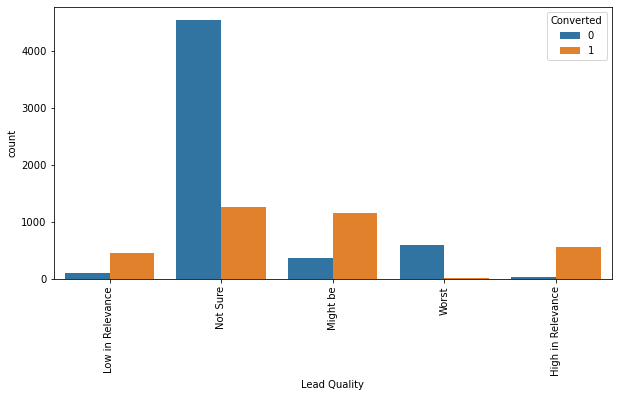

In [88]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = df)
xticks(rotation = 90)

In [89]:
df['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

In [90]:
df['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

In [91]:
df['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

In [92]:
df['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

In [93]:
df.City.describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

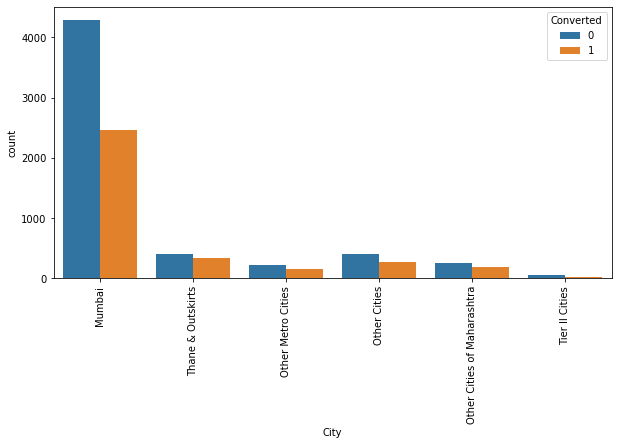

In [94]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = df)
xticks(rotation = 90)

In [95]:
df['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

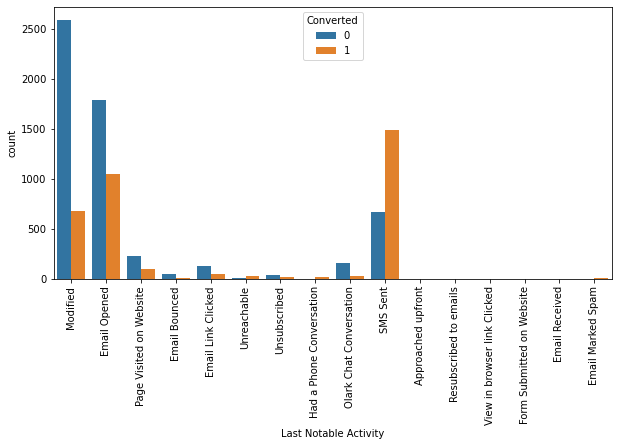

In [96]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
xticks(rotation = 90)

## Results

In [97]:
df = df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [98]:
df.shape

(9074, 16)

In [99]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


### Data Preparation

In [100]:
# Converting some binary variables (Yes/No) to 1/0
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [101]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [102]:
# Adding the results to the main dataframe
df = pd.concat([df, dummy1], axis=1)
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [103]:
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [104]:
df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [105]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['Prospect ID','Converted'], axis=1)

In [106]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [108]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [109]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [111]:
# Checking the Churn Rate
converted = (sum(df['Converted'])/len(df['Converted'].index))*100
converted

37.85541106458012

### Model Building

In [112]:
import statsmodels.api as sm

In [113]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6264
Model Family:                Binomial   Df Model:                           86
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1090.9
Date:                Mon, 17 May 2021   Deviance:                       2181.8
Time:                        22:10:42   Pearson chi2:                 1.21e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   19.4215   2.16e+05   8.99e-05      1.000   -4.23e+05    4.23e+05
Do Not Email                                            -1.2564      0.353     -3.563      0.000      -1.947      -0.565
Do Not Call                                             22.0626   1.39e+05      0.000      1.000   -2.72e+05    2.73e+05
TotalVisits                                              0.3189      0.094      3.405      0.001       0.135       0.502
Total Time Spent on Website                              1.1794      0.069     17.152      0.000       1.045       1.314
Page Views Per Visit                                    -0.3941      0.108     -3.646      0.000      -0.606      -0.182
Lead Origin_Landing Page Submission                     -0.8208      0.249     -3.302      0.001      -1.308      -0.334
Lead Origin_Lead Add Form                               -1.3643      2.076     -0.657      0.511      -5.432       2.704
Lead Origin_Lead Import                                 27.3587   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -26.1871   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2772      0.170      1.626      0.104      -0.057       0.611
Lead Source_Olark Chat                                   1.0956      0.256      4.276      0.000       0.593       1.598
Lead Source_Organic Search                               0.0545      0.229      0.237      0.812      -0.395       0.504
Lead Source_Others                                       1.0372      0.912      1.138      0.255      -0.750       2.824
Lead Source_Reference                                    2.4250      2.125      1.141      0.254      -1.740       6.590
Lead Source_Referral Sites                               0.0627      0.535      0.117      0.907      -0.985       1.110
Lead Source_Welingak Website                             6.7360      2.205      3.054      0.002       2.414      11.058
Last Activity_Email Bounced                              0.0015      0.914      0.002      0.999      -1.789       1.792
Last Activity_Email Link Clicked                         1.0554      0.704      1.499      0.134      -0.324       2.435
Last Activity_Email Opened                               0.3367      0.444      0.759      0.448      -0.533       1.206
Last Activity_Form Submitted on Website                  0.1619      0.706      0.229      0.819      -1.222       1.546
Last Activity_Olark Chat Conversation                   -0.3242      0.449     -0.723      0.470      -1.203       0.555
Last Activity_Other_Activity                             2

In [114]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [115]:
rfe.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False])

In [116]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 4),
 ('Do Not Call', False, 48),
 ('TotalVisits', False, 31),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 30),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Source_Facebook', False, 67),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', False, 69),
 ('Lead Source_Others', False, 23),
 ('Lead Source_Reference', False, 29),
 ('Lead Source_Referral Sites', False, 62),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 63),
 ('Last Activity_Email Link Clicked', False, 33),
 ('Last Activity_Email Opened', False, 41),
 ('Last Activity_Form Submitted on Website', False, 72),
 ('Last Activity_Olark Chat Conversation', False, 11),
 ('Last Activity_Other_Activity', False, 8),
 ('Last Activity_Page Visited on Website', False, 59),
 ('Last Activity_SMS Sent'

In [117]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Revert after reading email', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [118]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specializa

In [119]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1361.5
Date:                Mon, 17 May 2021   Deviance:                       2722.9
Time:                        22:11:57   Pearson chi2:                 1.03e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.6204      0.192    -13.658      0.000      -2.996      -2.244
Lead Origin_Lead Add Form                         0.3580      0.442      0.810      0.418      -0.509       1.225
Lead Source_Welingak Website                      3.9927      0.863      4.628      0.000       2.302       5.684
Last Activity_SMS Sent                            2.1072      0.110     19.149      0.000       1.892       2.323
Tags_Busy                                         1.8086      0.289      6.267      0.000       1.243       2.374
Tags_Closed by Horizzon                           8.4519      0.752     11.237      0.000       6.978       9.926
Tags_Lost to EINS                                 8.2064      0.787     10.427      0.000       6.664       9.749
Tags_Revert after reading email                   1.3489      0.196      6.893      0.000       0.965       1.732
Tags_Ringing                                     -2.2352      0.303     -7.389      0.000      -2.828      -1.642
Tags_Will revert after reading the email          6.2992      0.262     24.065      0.000       5.786       6.812
Tags_invalid number                             -22.5888   1.51e+04     -0.001      0.999   -2.97e+04    2.96e+04
Tags_switched off                                -2.3219      0.550     -4.218      0.000      -3.401      -1.243
Tags_wrong number given                         -22.6254   2.06e+04     -0.001      0.999   -4.04e+04    4.03e+04
Lead Quality_Worst                               -2.1290      0.694     -3.068      0.002      -3.489      -0.769
Last Notable Activity_Modified                   -1.9031      0.123    -15.429      0.000      -2.145      -1.661
Last Notable Activity_Olark Chat Conversation    -1.1189      0.380     -2.942      0.003      -1.864      -0.374
=================================================================================================================
"""

In [120]:
col1 = col.drop('Tags_invalid number',1)

In [121]:
col1

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Revert after reading email', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [122]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1369.1
Date:                Mon, 17 May 2021   Deviance:                       2738.3
Time:                        22:15:36   Pearson chi2:                 1.01e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.8294      0.193    -14.694      0.000      -3.207      -2.452
Lead Origin_Lead Add Form                         0.4042      0.445      0.908      0.364      -0.468       1.277
Lead Source_Welingak Website                      3.9402      0.863      4.563      0.000       2.248       5.633
Last Activity_SMS Sent                            2.0705      0.109     19.006      0.000       1.857       2.284
Tags_Busy                                         2.0379      0.286      7.116      0.000       1.477       2.599
Tags_Closed by Horizzon                           8.6276      0.753     11.464      0.000       7.153      10.103
Tags_Lost to EINS                                 8.3902      0.787     10.658      0.000       6.847       9.933
Tags_Revert after reading email                   1.5662      0.195      8.024      0.000       1.184       1.949
Tags_Ringing                                     -1.9985      0.300     -6.658      0.000      -2.587      -1.410
Tags_Will revert after reading the email          6.4967      0.263     24.708      0.000       5.981       7.012
Tags_switched off                                -2.0807      0.549     -3.791      0.000      -3.156      -1.005
Tags_wrong number given                         -21.3899   1.25e+04     -0.002      0.999   -2.45e+04    2.45e+04
Lead Quality_Worst                               -2.1149      0.696     -3.038      0.002      -3.479      -0.750
Last Notable Activity_Modified                   -1.8798      0.123    -15.281      0.000      -2.121      -1.639
Last Notable Activity_Olark Chat Conversation    -1.1217      0.380     -2.951      0.003      -1.867      -0.377
=================================================================================================================
"""

In [123]:
col2 = col1.drop('Tags_wrong number given',1)

In [124]:
col2

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Revert after reading email', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [125]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1372.8
Date:                Mon, 17 May 2021   Deviance:                       2745.6
Time:                        22:15:58   Pearson chi2:                 1.01e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.9312      0.193    -15.197      0.000      -3.309      -2.553
Lead Origin_Lead Add Form                         0.4253      0.447      0.952      0.341      -0.451       1.301
Lead Source_Welingak Website                      3.9166      0.864      4.533      0.000       2.223       5.610
Last Activity_SMS Sent                            2.0536      0.109     18.920      0.000       1.841       2.266
Tags_Busy                                         2.1495      0.285      7.533      0.000       1.590       2.709
Tags_Closed by Horizzon                           8.7165      0.753     11.579      0.000       7.241      10.192
Tags_Lost to EINS                                 8.4743      0.786     10.780      0.000       6.934      10.015
Tags_Revert after reading email                   1.6724      0.195      8.584      0.000       1.291       2.054
Tags_Ringing                                     -1.8840      0.299     -6.300      0.000      -2.470      -1.298
Tags_Will revert after reading the email          6.5948      0.263     25.040      0.000       6.079       7.111
Tags_switched off                                -1.9640      0.548     -3.583      0.000      -3.038      -0.890
Lead Quality_Worst                               -2.0828      0.699     -2.980      0.003      -3.453      -0.713
Last Notable Activity_Modified                   -1.8717      0.123    -15.232      0.000      -2.113      -1.631
Last Notable Activity_Olark Chat Conversation    -1.1225      0.380     -2.953      0.003      -1.868      -0.377
=================================================================================================================
"""

In [127]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.221178
1012    0.221178
9226    0.009629
4750    0.688853
7987    0.996747
1281    0.996722
2880    0.221178
4971    0.781067
7536    0.975001
1248    0.009629
dtype: float64

In [128]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22117798, 0.22117798, 0.00962908, 0.6888531 , 0.99674731,
       0.99672175, 0.22117798, 0.78106681, 0.97500053, 0.00962908])

In [129]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.221178,3009
1,0,0.221178,1012
2,0,0.009629,9226
3,1,0.688853,4750
4,1,0.996747,7987


In [130]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.221178,3009,0
1,0,0.221178,1012,0
2,0,0.009629,9226,0
3,1,0.688853,4750,1
4,1,0.996747,7987,1


In [131]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3761  144]
 [ 328 2118]]


In [132]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9256809951188789


In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Welingak Website,1.37
4,Tags_Closed by Horizzon,1.17
3,Tags_Busy,1.05
5,Tags_Lost to EINS,1.04
10,Lead Quality_Worst,1.04
9,Tags_switched off,1.01
11,Last Notable Activity_Modified,1.01
0,Lead Origin_Lead Add Form,0.67
12,Last Notable Activity_Olark Chat Conversation,0.40
8,Tags_Will revert after reading the email,0.16


In [135]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [136]:
# sensitivity of logistic regression model
TP / float(TP+FN)

0.8659035159443991

In [137]:
# specificity of logistic regression model
TN / float(TN+FP)

0.963124199743918

In [138]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.03687580025608195


In [139]:
# positive predictive value 
print (TP / float(TP+FP))

0.9363395225464191


In [140]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9197847884568354


###  Plotting ROC Curve

In [141]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [142]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

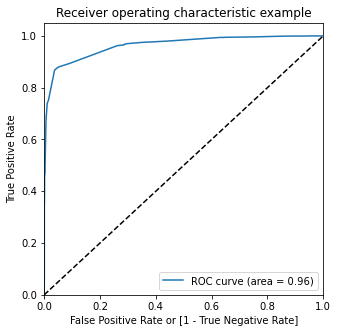

In [143]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

In [144]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.221178,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.221178,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.009629,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.688853,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.996747,7987,1,1,1,1,1,1,1,1,1,1,1


In [145]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.824122  0.962796  0.737260
0.2   0.2  0.824122  0.962796  0.737260
0.3   0.3  0.924736  0.874489  0.956210
0.4   0.4  0.925681  0.865904  0.963124
0.5   0.5  0.925681  0.865904  0.963124
0.6   0.6  0.925681  0.865904  0.963124
0.7   0.7  0.896709  0.757972  0.983611
0.8   0.8  0.892615  0.737939  0.989501
0.9   0.9  0.875610  0.688880  0.992574


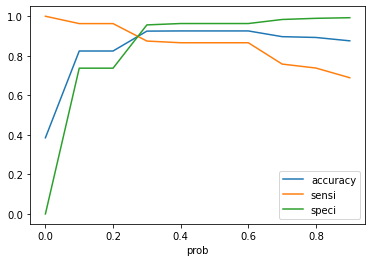

In [146]:
# Plotting accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [147]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.221178,3009,0,1,1,1,0,0,0,0,0,0,0,1
1,0,0.221178,1012,0,1,1,1,0,0,0,0,0,0,0,1
2,0,0.009629,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.688853,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.996747,7987,1,1,1,1,1,1,1,1,1,1,1,1


### Assigning Lead Score

In [148]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.221178,3009,0,1,1,1,0,0,0,0,0,0,0,1,22
1,0,0.221178,1012,0,1,1,1,0,0,0,0,0,0,0,1,22
2,0,0.009629,9226,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0.688853,4750,1,1,1,1,1,1,1,1,0,0,0,1,69
4,1,0.996747,7987,1,1,1,1,1,1,1,1,1,1,1,1,100


In [149]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [152]:
#sensitivity of the logistic regression model
TP / float(TP+FN)

0.9627964022894522

In [153]:
#specificity of the logistic regression model
TN / float(TN+FP)

0.7372599231754161

In [154]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2627400768245839


In [155]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6965394853593612


In [156]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9693602693602693


### Precision and Recall

In [157]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3761,  144],
       [ 328, 2118]], dtype=int64)

In [158]:
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9363395225464191

In [159]:
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8659035159443991

In [160]:
from sklearn.metrics import precision_score, recall_score

In [161]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.9363395225464191

In [162]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8659035159443991

### Precision and recall tradeoff

In [163]:
from sklearn.metrics import precision_recall_curve

In [164]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [165]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

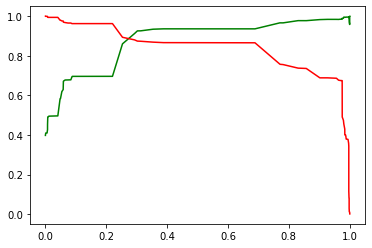

In [166]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Making predictions on the test set

In [167]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [168]:
X_test = X_test[col2]
X_test.head()

,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Revert after reading email,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Worst,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
3271,0,0,0,0,0,0,1,0,0,0,0,0,0
1490,0,0,0,0,0,0,0,0,1,0,0,0,0
7936,0,0,0,0,0,0,1,0,0,0,0,0,0
4216,1,0,0,0,1,0,0,0,0,0,0,1,0
3830,0,0,0,0,0,0,1,0,0,0,0,0,0


In [169]:
X_test_sm = sm.add_constant(X_test)

In [170]:
y_test_pred = res.predict(X_test_sm)

In [171]:
y_test_pred[:10]

3271    0.221178
1490    0.975001
7936    0.221178
4216    0.987118
3830    0.221178
1800    0.975001
6507    0.059435
4821    0.007427
4223    0.997855
4714    0.254088
dtype: float64

In [172]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [173]:
y_pred_1.head()

,0
3271,0.221178
1490,0.975001
7936,0.221178
4216,0.987118
3830,0.221178


In [174]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [175]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [176]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [177]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [178]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.221178
1,1,1490,0.975001
2,0,7936,0.221178
3,1,4216,0.987118
4,0,3830,0.221178


In [179]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [184]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_prob'], axis=1)

In [185]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.221178
1,1490,1,0.975001
2,7936,0,0.221178
3,4216,1,0.987118
4,3830,0,0.221178


In [186]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [187]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.221178,1
1,1490,1,0.975001,1
2,7936,0,0.221178,1
3,4216,1,0.987118,1
4,3830,0,0.221178,1


In [188]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8079324274697025

In [189]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1258,  476],
       [  47,  942]], dtype=int64)

In [190]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [191]:
# sensitivity of the logistic regression model
TP / float(TP+FN)

0.9524772497472194

In [192]:
# specificity of the logistic regression model
TN / float(TN+FP)

0.7254901960784313